In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
n_tests = 10
tests_by_n_elems = {
    n_elems: [np.random.randint(0, 50, size=(n_elems,)) for _ in range(n_tests)]
    for n_elems in [100, 500, 1000, 5000, 10000] #, 100000]
}

In [4]:
import time

def test(structure_class, tests_set=tests_by_n_elems):
    result = []
    for n_elems in tests_set:
        start = time.time()
        
        for test in tests_set[n_elems]:
            structure = structure_class()
            for elem in test:
                structure.add(elem)
                structure.get_min()
        
        result.append((n_elems, (time.time() - start) / n_tests))
    return result
    

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = (10.0, 6.0)

kwargs = dict(marker='o', markersize=10)

# Задача

Поступают данные, нужно после каждого добавления возвращать наименьший элемент

## Наивная реализация

Складываем все значения в список, берём минимум

In [6]:
class MyStructureNaive:
    def __init__(self):
        self.elements = []
        
    def add(self, elem):
        self.elements.append(elem)
        
    def get_min(self):
        return min(self.elements)

In [7]:
res_naive = test(MyStructureNaive)

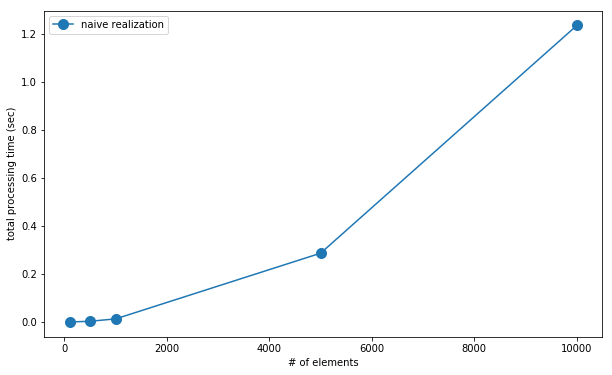

In [8]:
plt.plot(*zip(*sorted(res_naive)), c=colors[0], label='naive realization', **kwargs)

plt.xlabel('# of elements')
plt.ylabel('total processing time (sec)')
plt.legend()

## Пробуем ускорить с помощью set()

Предположим, мы узнали, что уникальных значений немного -- можно хранить только уникальные

In [9]:
class MyStructureSet:
    def __init__(self):
        self.elements = set()
        
    def add(self, elem):
        self.elements.add(elem)
        
    def get_min(self):
        return min(self.elements)

In [10]:
res_set = test(MyStructureSet)

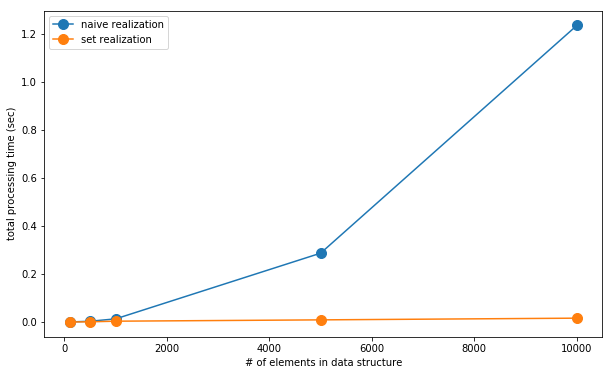

In [11]:
plt.plot(*zip(*sorted(res_naive)), c=colors[0], label='naive realization', **kwargs)
plt.plot(*zip(*sorted(res_set)), c=colors[1], label='set realization', **kwargs)

plt.xlabel('# of elements in data structure')
plt.ylabel('total processing time (sec)')
plt.legend()

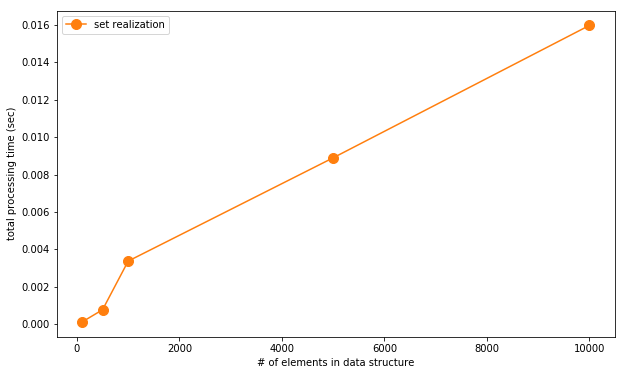

In [12]:
plt.plot(*zip(*sorted(res_set)), c=colors[1], label='set realization', **kwargs)

plt.xlabel('# of elements in data structure')
plt.ylabel('total processing time (sec)')
plt.legend()

## Но что если почти все значения уникальны?

In [13]:
tests_by_n_elems_unique = {
    n_elems: [np.random.random(size=(n_elems,)) for _ in range(n_tests)]
    for n_elems in [100, 500, 1000, 5000, 10000] #, 100000]
}

In [14]:
res_set_unique = test(MyStructureSet, tests_set=tests_by_n_elems_unique)

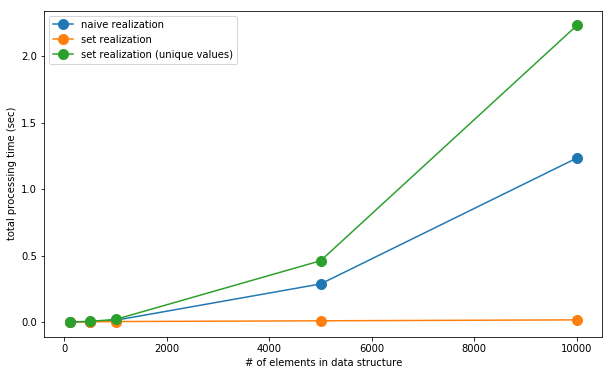

In [15]:
plt.plot(*zip(*sorted(res_naive)), c=colors[0], label='naive realization', **kwargs)
plt.plot(*zip(*sorted(res_set)), c=colors[1], label='set realization', **kwargs)
plt.plot(*zip(*sorted(res_set_unique)), c=colors[2], label='set realization (unique values)', **kwargs)

plt.xlabel('# of elements in data structure')
plt.ylabel('total processing time (sec)')
plt.legend()

# И что делать?

Вспомним про структуру данных "куча", она позволяет за $O(1)$ находить минимум

In [16]:
from heapq import heappush

class MyStructureHeap:
    def __init__(self):
        self.elements = []
        
    def add(self, elem):
        heappush(self.elements, elem)
        
    def get_min(self):
        return self.elements[0]

In [17]:
res_heap = test(MyStructureHeap)
res_heap_unique = test(MyStructureHeap, tests_set=tests_by_n_elems_unique)

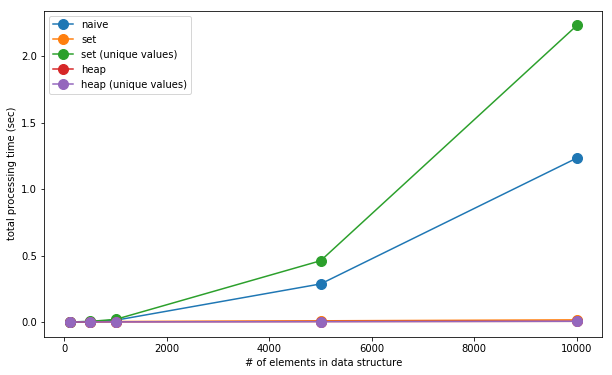

In [18]:
plt.plot(*zip(*sorted(res_naive)), c=colors[0], label='naive', **kwargs)
plt.plot(*zip(*sorted(res_set)), c=colors[1], label='set', **kwargs)
plt.plot(*zip(*sorted(res_set_unique)), c=colors[2], label='set (unique values)', **kwargs)
plt.plot(*zip(*sorted(res_heap)), c=colors[3], label='heap', **kwargs)
plt.plot(*zip(*sorted(res_heap_unique)), c=colors[4], label='heap (unique values)', **kwargs)

plt.xlabel('# of elements in data structure')
plt.ylabel('total processing time (sec)')
plt.legend()

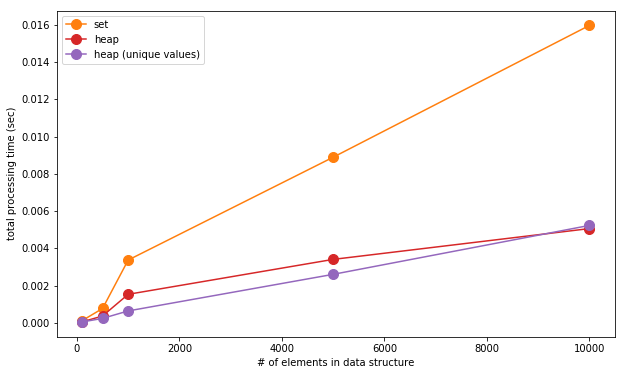

In [20]:
#plt.plot(*zip(*sorted(res_naive)), c=colors[0], label='naive', **kwargs)
plt.plot(*zip(*sorted(res_set)), c=colors[1], label='set', **kwargs)
#plt.plot(*zip(*sorted(res_set_unique)), c=colors[2], label='set (unique values)', **kwargs)
plt.plot(*zip(*sorted(res_heap)), c=colors[3], label='heap', **kwargs)
plt.plot(*zip(*sorted(res_heap_unique)), c=colors[4], label='heap (unique values)', **kwargs)

plt.xlabel('# of elements in data structure')
plt.ylabel('total processing time (sec)')
plt.legend()

# Выводы

* Для **конкретного** способа использования эта структура данных подходит
* Для какого-то другого -- неизвестно